In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('output_v1.csv')
df_2 = pd.read_csv('output_v2.csv')
df_3 = pd.read_csv('output_v3.csv')

In [3]:
MM0 = []
MM1 = []
MM2 = []
MM3 = []
MM4 = []
MM5 = []

for j in range(3): 
    off_target_data = pd.read_csv('./casoffinder_' + str(j+1) + '.txt', sep='\t')
    
    mismatch_guides_0 = []
    mismatch_guides_1 = []
    mismatch_guides_2 = []
    mismatch_guides_3 = []
    mismatch_guides_4 = []
    mismatch_guides_5 = []

    for i in range(len(off_target_data)):
        if off_target_data['Mismatches'][i] == 0:
            mismatch_guides_0.append(off_target_data['crRNA'][i])

    MM0.append(len(list(np.unique(mismatch_guides_0))))

    for i in range(len(off_target_data)):
        if off_target_data['Mismatches'][i] == 1:
            mismatch_guides_1.append(off_target_data['crRNA'][i])

    MM1.append(len(list(np.unique(mismatch_guides_1))))

    for i in range(len(off_target_data)):
        if off_target_data['Mismatches'][i] == 2:
            mismatch_guides_0.append(off_target_data['crRNA'][i])

    MM2.append(len(list(np.unique(mismatch_guides_2))))

    for i in range(len(off_target_data)):
        if off_target_data['Mismatches'][i] == 3:
            mismatch_guides_0.append(off_target_data['crRNA'][i])

    MM3.append(len(list(np.unique(mismatch_guides_3))))

    for i in range(len(off_target_data)):
        if off_target_data['Mismatches'][i] == 4:
            mismatch_guides_4.append(off_target_data['crRNA'][i])

    MM4.append(len(list(np.unique(mismatch_guides_4))))

    for i in range(len(off_target_data)):
        if off_target_data['Mismatches'][i] == 5:
            mismatch_guides_5.append(off_target_data['crRNA'][i])

    MM5.append(len(list(np.unique(mismatch_guides_5))))

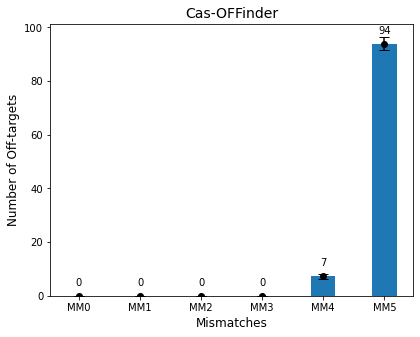

In [4]:
bar_labels = ['MM0', 'MM1', 'MM2', 'MM3', 'MM4', 'MM5']
bar_values =  [np.mean(MM0) - np.mean([len(df_1),len(df_2),len(df_3)]), np.mean(MM1), np.mean(MM2), np.mean(MM3), np.mean(MM4), np.mean(MM5)]
bar_std =  [np.std([m - n for m, n in zip(MM0, [len(df_1),len(df_2),len(df_3)])]), np.std(MM1), np.std(MM2), np.std(MM3), np.std(MM4), np.std(MM5)]
  
fig = plt.figure(figsize = (6.5, 5))
bar_width = 0.4
# creating the bar plot 
plt.xlabel("Mismatches", fontsize=12)
plt.ylabel("Number of Off-targets", fontsize=12)
#plt.title("Cas-OFFinder off-target check R64 with s288c assembly GCA_000146045.2", fontsize=18)
plt.title("Cas-OFFinder", fontsize=14)
bar = plt.bar(bar_labels, bar_values, bar_width, align='center')
(_, caps, _) = plt.errorbar(bar_labels, bar_values, yerr=bar_std, fmt="o", color='black', capsize=5)

for cap in caps:
    cap.set_markeredgewidth(1)
    
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height + 3, f'{height:.0f}', ha='center', va='bottom')
    
plt.show()
#plt.savefig('Cas-OFFinder off-target check_v1.png', dpi = 400)